## Что необходимо сделать:
1. Определить кто основные грузоотправители в каждом регионе (топ-3), остальных объединить в прочих грузоотправителей.
2. Определить основных потребителей металлолома в каждом регионе. Тут выделить крупные заводы, а все остальное объединить в прочих потребителей.
3. Определить топ-10 основных арендаторов вагонов.  
Здесь, во-первых, нужно выделить вагоны из массива по столбцу «NumberVag» (восемь цифр, например 56353063, это вагоны; одиннадцать цифр, например, GESU1131822, это контейнеры).   
Во-вторых, если в столбце «Арендатор» написано «НЕ УКАЗАННА!!!», значит данные нужно взять из столбца «Собств».  
4. Сделать основные выводы по данному массиву информации, представить их в наглядной форме.

Я буду использовать Python для очистки, преобразования и визуализации данных. Установлены следующие библиотеки:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px 
%matplotlib inline

При отсутсвии данных библиотек, их можно установить с помощью следующих команд:

In [2]:
# !pip install seaborn
# !pip install plotly

Получаем исходные данные из source:

In [3]:
df = pd.read_excel(r'source\railway_base.xlsx')

Получим общую информацию об исходных данных:

In [4]:
df.head()

Дата отправления  Код груза Субъект федерации отп    Дор отпр Станц отпр РФ  \
0       2017-04-01      31603   КЕМЕРОВСКАЯ ОБЛАСТЬ  ЗAП-CИБИPC     ЕРУНАКОВО   
1       2017-04-01      31603   КЕМЕРОВСКАЯ ОБЛАСТЬ  ЗAП-CИБИPC         МЫСКИ   
2       2017-04-01      31605     ИРКУТСКАЯ ОБЛАСТЬ  B-CИБИPCKA     ЧЕРЕМХОВО   
3       2017-04-01      31605     ИРКУТСКАЯ ОБЛАСТЬ  B-CИБИPCKA     ЧЕРЕМХОВО   
4       2017-04-01      31605        ОМСКАЯ ОБЛАСТЬ  ЗAП-CИБИPC     ОМСК-ВОСТ   

                           Грузоотправитель Субъект федерации наз     Дор наз  \
0  УГОЛЬНАЯ КОМПАНИЯ КУЗБАССРАЗРЕЗУГОЛЬ ОАО  СВЕРДЛОВСКАЯ ОБЛАСТЬ  CBEPДЛOBCK   
1                        ЮЖНЫЙ  КУЗБАСС ОАО   КЕМЕРОВСКАЯ ОБЛАСТЬ  ЗAП-CИБИPC   
2                            ВТОРЧЕРМЕТ ООО   КЕМЕРОВСКАЯ ОБЛАСТЬ  ЗAП-CИБИPC   
3                            ВТОРЧЕРМЕТ ООО   КЕМЕРОВСКАЯ ОБЛАСТЬ  ЗAП-CИБИPC   
4                ВТОРЧЕРМЕТ НЛМК СИБИРЬ ООО  СВЕРДЛОВСКАЯ ОБЛАСТЬ  CBEPДЛOBCK   

     Станц назн РФ                                    Грузополучатель  \
0  СЕРОВ-ЗАВОДСКОЙ               МЕТАЛЛУРГИЧЕСКИЙ ЗАВОД ИМ. А. К. ОАО   
1         ГУРЬЕВСК              ГУРЬЕВСКИЙ МЕТАЛЛУРГИЧЕСКИЙ ЗАВОД ОАО   
2     НОВОКУЗ.-СЕВ  ЕВРАЗ ОБЪЕДИНЕННЫЙ ЗАПАДНО-СИБИРСКИЙ МЕТАЛЛУР ОАО   
3     НОВОКУЗ.-СЕВ  ЕВРАЗ ОБЪЕДИНЕННЫЙ ЗАПАДНО-СИБИРСКИЙ МЕТАЛЛУР ОАО   
4            РЕВДА  НИЖНЕСЕРГИНСКИЙ МЕТИЗНО-МЕТАЛЛУРГИЧЕСКИЙ ЗАВОД...   

   Объем перевозок (тн)  Кол-во вагонов NumberVag NumberNakl  \
0                  61.0               1  61150710   ЭВ134425   
1                  56.2               1  52010774   ЭВ087016   
2                  63.6               1  53848461   ЭВ207539   
3                  60.0               1  61659116   ЭВ208026   
4                  58.2               1  55445126   ЭВ126459   

                        Собств            Арендатор   Плательщик  
0    КУЗБАССРАЗРЕЗУГОЛЬ УК ОАО       УГМК-ТРАНС ООО   УГМК-ТРАНС  
1               ВТБ-ЛИЗИНГ ОАО      МЕЧЕЛ-ТРАНС ООО  МЕЧЕЛ-ТРАНС  
2          ПРОМТРАНСИНВЕСТ ЗАО  НЕФТЕТРАНССЕРВИС АО    ЗСЭМЗ ООО  
3                ВЭБ-ЛИЗИНГ АО  НЕФТЕТРАНССЕРВИС АО    ЗСЭМЗ ООО  
4  ПЕРВАЯ ГРУЗОВАЯ КОМПАНИЯ АО       НЕ УКАЗАННА!!!       АО ПГК

In [5]:
df.shape

(4898, 17)

In [6]:
df.columns

Index(['Дата отправления', 'Код груза', 'Субъект федерации отп', 'Дор отпр',
       'Станц отпр РФ', 'Грузоотправитель', 'Субъект федерации наз', 'Дор наз',
       'Станц назн РФ', 'Грузополучатель', 'Объем перевозок (тн)',
       'Кол-во вагонов', 'NumberVag', 'NumberNakl', 'Собств', 'Арендатор',
       'Плательщик'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Дата отправления       4898 non-null   datetime64[ns]
 1   Код груза              4898 non-null   int64         
 2   Субъект федерации отп  4898 non-null   object        
 3   Дор отпр               4898 non-null   object        
 4   Станц отпр РФ          4898 non-null   object        
 5   Грузоотправитель       4898 non-null   object        
 6   Субъект федерации наз  4898 non-null   object        
 7   Дор наз                4898 non-null   object        
 8   Станц назн РФ          4898 non-null   object        
 9   Грузополучатель        4898 non-null   object        
 10  Объем перевозок (тн)   4898 non-null   float64       
 11  Кол-во вагонов         4898 non-null   int64         
 12  NumberVag              4898 non-null   object        
 13  Num

Для работы с данными переименуем некоторые столбцы:

In [8]:
df = df.rename(columns = {'Собств':'sobstv',
                          'Арендатор': 'arenda',
                          'Грузополучатель':'gruzopoluch', 
                          'Субъект федерации наз':'sub_fed_nazn',
                          'Дата отправления':'date_otp', 
                          'Субъект федерации отп':'sub_fed_otp', 
                          'Грузоотправитель':'gruzootpravitel', 
                          'Объем перевозок (тн)':'v_perevozok'})

### Задача 1  
<i>Определить кто основные грузоотправители в каждом регионе (топ-3), остальных объединить в прочих грузоотправителей.</i>

In [9]:
#группируем по регионам и грузоотправителям
top_grz_otp = df.copy()\
                .groupby(['sub_fed_otp', 'gruzootpravitel'], as_index = False)\
                .agg({'v_perevozok':'sum'}) #суммируем объем перевозок

#вычисляем долю перевозки грузоотправителя в общем объёме перевозок в федеральном округе
top_grz_otp['proportion'] = top_grz_otp['v_perevozok']/top_grz_otp.groupby('sub_fed_otp')['v_perevozok'].transform('sum')*100 

In [10]:
#найдем топ 3 грузоотправителей в каждом регионе
#каждый грузоотправитель под своим индексом. Как вывести сюда названия пока не знаю, но это и не принципиально
larg = top_grz_otp.groupby(['sub_fed_otp'])['proportion']\
                  .nlargest(3)\
                  .to_frame(name='proportion')\
                  .reset_index()

In [11]:
#объединяем таблицу грузоотправителей по регионам и топовых грузоотправителей
top_grz_otp = top_grz_otp.merge(larg,how = 'left', left_index  = True, right_on = 'level_1')
top_grz_otp.loc[(top_grz_otp.proportion_y.isna() == True), 'gruzootpravitel'] = 'Прочие грузоотправители'

In [12]:
#складываем все суммы по прочим грузоотправителям
top_grz_otp = top_grz_otp.groupby(['sub_fed_otp_x','gruzootpravitel'], as_index = False)\
                         .agg({'v_perevozok':'sum'})\
                         .sort_values(['sub_fed_otp_x','v_perevozok'], ascending = [True, False])

In [13]:
#результат
top_grz_otp.head(8)

sub_fed_otp_x             gruzootpravitel  v_perevozok
3      АЛТАЙСКИЙ КРАЙ     Прочие грузоотправители     8913.850
0      АЛТАЙСКИЙ КРАЙ                 ВТОРМЕТ ООО     7889.940
1      АЛТАЙСКИЙ КРАЙ  ВТОРЧЕРМЕТ НЛМК СИБИРЬ ООО     3163.950
2      АЛТАЙСКИЙ КРАЙ               ПМП-ТРАНС ООО     2440.300
7  ЗАБАЙКАЛЬСКИЙ КРАЙ     Прочие грузоотправители     8876.506
4  ЗАБАЙКАЛЬСКИЙ КРАЙ                ДВМ-ЧИТА ООО     3706.190
6  ЗАБАЙКАЛЬСКИЙ КРАЙ             ПЕРСПЕКТИВА ООО     2994.850
5  ЗАБАЙКАЛЬСКИЙ КРАЙ      ЗАБАЙКАЛПРОМИНВЕСТ ООО     1877.300

### Задача 2  
<i>Определить основных потребителей металлолома в каждом регионе. Тут выделить крупные заводы, а все остальное объединить в прочих потребителей.</i>

In [14]:
#действуем аналогично задаче 1. Группируем по федеральным округам и грузополучателям (потребителям), суммируем объем перевозок
zavods = df.copy().groupby(['sub_fed_nazn', 'gruzopoluch'], as_index = False)\
                  .agg({'v_perevozok':'sum'})
#вычисляем долю перевозки грузоотправителя в общем объёме перевозок в федеральном округе
zavods['proportion'] = zavods['v_perevozok']/zavods.groupby('sub_fed_nazn')['v_perevozok'].transform('sum')*100

In [15]:
#шаг с определением основных потребитлей выполним несколько иным способом, нежели в прошлой задаче
#так, как в данном случае нам конкретно не заданы признаки "основного потребителя"

#рассчитаем медиану доли перевозок по каждому региону и будем считать, что все потребители равные или выше данной медианы будут считаться основными
mediana_v_potreb = zavods.groupby('sub_fed_nazn', as_index = False)\
                         .agg({'proportion':'median'})\
                         .sort_values('sub_fed_nazn')

In [16]:
#соединим таблицу с объемами по потребителям и таблицу медианных значений
zavods = zavods.merge(mediana_v_potreb, how = 'left', left_on = 'sub_fed_nazn', right_on = 'sub_fed_nazn')
#Определим всех прочих грузополучателей, медиана которых ниже общей
zavods.loc[((zavods['proportion_x']<zavods['proportion_y'])==True), 'gruzopoluch'] = 'Прочие грузополучатели'

In [17]:
#сгруппируем данные по федеральным округам и грузополучателям, суммируя объемы
zavods = zavods.groupby(['sub_fed_nazn','gruzopoluch'], as_index=False)\
               .agg({'v_perevozok':'sum'})\
               .sort_values(['sub_fed_nazn','v_perevozok'], ascending = [True, False])

In [18]:
#результат
zavods.head(12)

sub_fed_nazn                                        gruzopoluch  \
2        АЛТАЙСКИЙ КРАЙ                  РУБЦОВСКИЙ ФИЛИАЛ  АЛТАЙВАГОН ОАО   
0        АЛТАЙСКИЙ КРАЙ                                  БВРПНОВОТРАНС ООО   
1        АЛТАЙСКИЙ КРАЙ                             Прочие грузополучатели   
3   ВОЛОГОДСКАЯ ОБЛАСТЬ                                     ПАО СЕВЕРСТАЛЬ   
4     ИРКУТСКАЯ ОБЛАСТЬ                    БРАТСКИЙ ЗАВОД ФЕРРОСПЛАВОВ ООО   
5     ИРКУТСКАЯ ОБЛАСТЬ                                              ВРК-1   
6     ИРКУТСКАЯ ОБЛАСТЬ                             Прочие грузополучатели   
7   КЕМЕРОВСКАЯ ОБЛАСТЬ  ЕВРАЗ ОБЪЕДИНЕННЫЙ ЗАПАДНО-СИБИРСКИЙ МЕТАЛЛУР ОАО   
9   КЕМЕРОВСКАЯ ОБЛАСТЬ                                             КФ ОАО   
11  КЕМЕРОВСКАЯ ОБЛАСТЬ                                        ТАЕЖНЫЙ ООО   
8   КЕМЕРОВСКАЯ ОБЛАСТЬ                                ЗАВОД УНИВЕРСАЛ ОАО   
10  КЕМЕРОВСКАЯ ОБЛАСТЬ                             Прочие грузополучатели   

    v_perevozok  
2      9024.400  
0        64.850  
1        41.500  
3       560.300  
4       918.400  
5       273.250  
6       100.100  
7    113126.634  
9      2525.590  
11     1553.110  
8       980.720  
10      352.400

### Задача 3  
<i>Определить топ-10 основных арендаторов вагонов.  
Здесь, во-первых, нужно выделить вагоны из массива по столбцу «NumberVag» (восемь цифр, например 56353063, это вагоны; одиннадцать цифр, например, GESU1131822, это контейнеры).  
Во-вторых, если в столбце «Арендатор» написано «НЕ УКАЗАННА!!!», значит данные нужно взять из столбца «Собств»</i>

In [19]:
#скопируем df в отдельный датафрейм
arendators = df.copy()\

#добавляем столбец-признак, определяющий вагон при условии, что в названии восемь символов. True - вагон, False - не вагон
arendators['vagon'] = arendators.NumberVag.astype(str).apply(lambda x: len(x) == 8)

#в столбце arenda заменяем «НЕ УКАЗАННА!!!» на null, а потом null на значение столбца sobstv
arendators.arenda = arendators.arenda.replace('НЕ УКАЗАННА!!!', None).fillna(arendators.sobstv)

In [20]:
#фильтруем по вагонам, берем арендаторов и считаем по ним value_counts. Сортируем от наибольшего к наименьшему. Выводим топ-10
arendators = arendators.query('vagon == True')\
                       .arenda.value_counts()\
                       .sort_values(ascending = False)\
                       .head(10)

In [21]:
#результат
arendators

НЕФТЕТРАНССЕРВИС АО               902
НОВАЯ ПЕРЕВОЗОЧНАЯ КОМПАНИЯ АО    863
ПЕРВАЯ ГРУЗОВАЯ КОМПАНИЯ АО       528
ФГК АО                            513
УГМК-ТРАНС ООО                     84
ПРОФТРАНС ООО                      67
НПК АО                             49
ТФМ-ОПЕРАТОР ООО                   48
ФИРМА ТРАНСГАРАНТ ООО              45
ТЛС АО                             42
Name: arenda, dtype: int64

### Задача 4  
<i>Сделать основные выводы по данному массиву информации, представить их в наглядной форме.</i>

В первой задаче мы определили основных грузоотправителей в каждом регионе (топ-3), а остальных объединили в прочих грузоотправителей.  
Теперь визуализируем полученные данные используя библиотеку seaborn.  

Для начала визуализируем общие объемы отправленного лома по каждому региону. Для визуализации был выбран тип графика Barplots (Гистограмма) библиотеки seaborn.

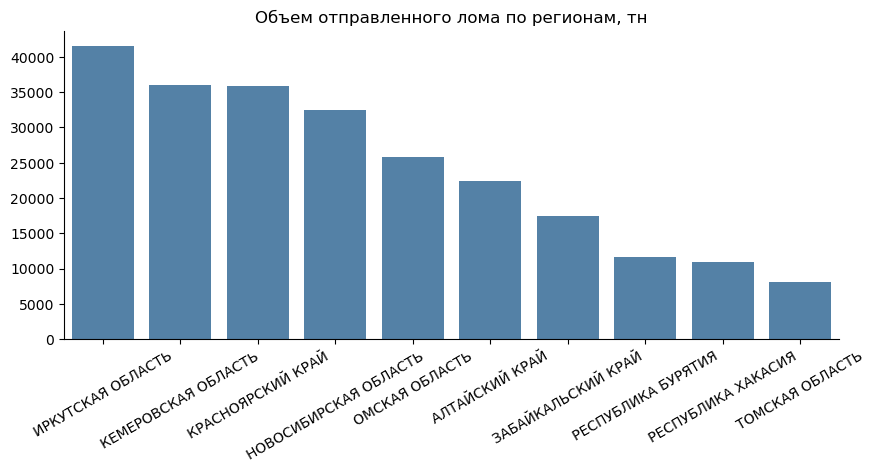

In [22]:
#область построения 11х6
plt.figure(figsize=(10,4))
#группируем по региону, суммируем общий объем, сортируем по убыванию
total_v = top_grz_otp.groupby('sub_fed_otp_x', as_index=False)\
                    .agg({'v_perevozok':'sum'})\
                    .sort_values('v_perevozok', ascending = False)
ax = sns.barplot(data=total_v,
                 x="sub_fed_otp_x",
                 y="v_perevozok",
                 ci= None, #отключаем линию погрешности
                 color='steelblue') #цвет
ax.set(xlabel= None, #убираем название оси х
       ylabel= None, #убираем название оси у
       title = 'Объем отправленного лома по регионам, тн') #задаем заголовок графика
#поворот меток оси x
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)
sns.despine()

Из графика видно, что наибольший объем перевозок в Иркусткой области (около 40 тыс. тн), в Кемеровской области и Красоярском крае (около 36 тыс. тн).  
Рассмотрим каждый регион подробнее: визуализируем основных грузоотправителей, прочих грузоотправителей и их объемы перевозок (в относительных величинах)

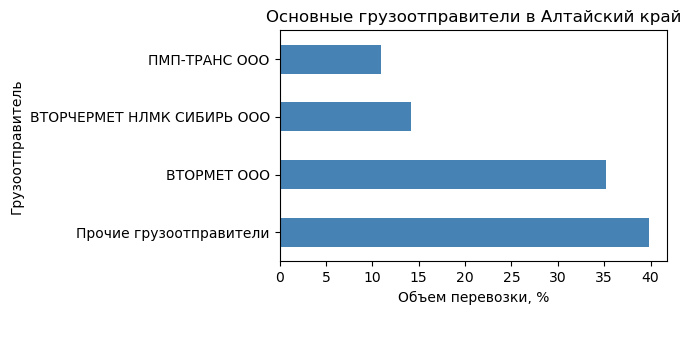

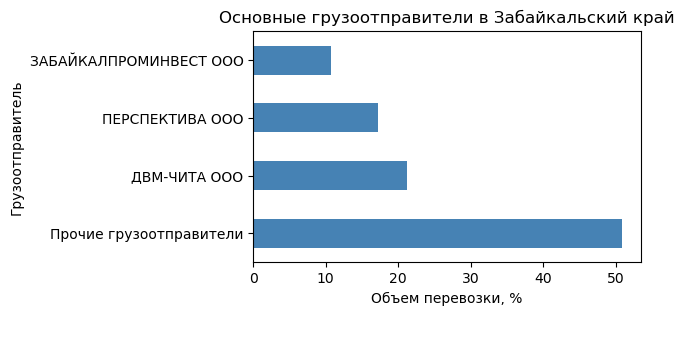

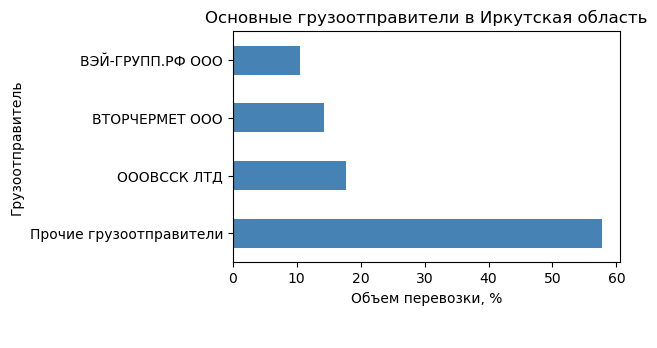

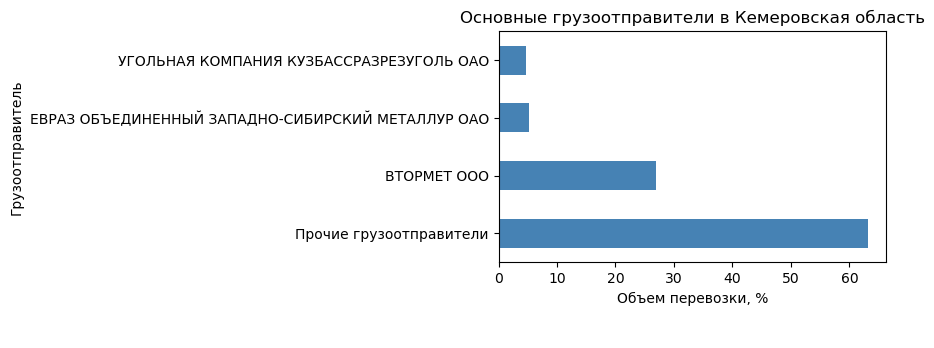

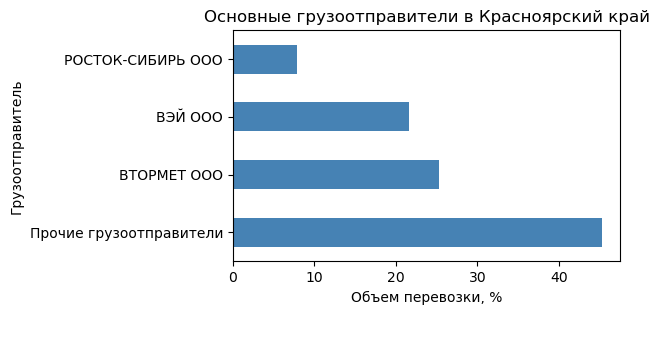

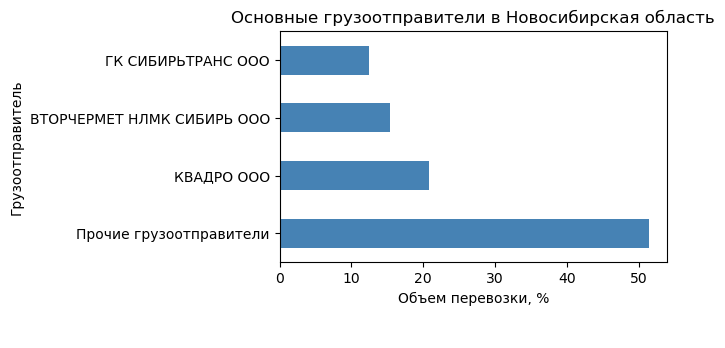

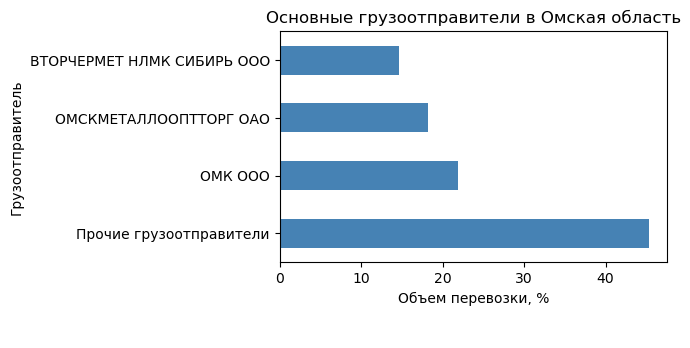

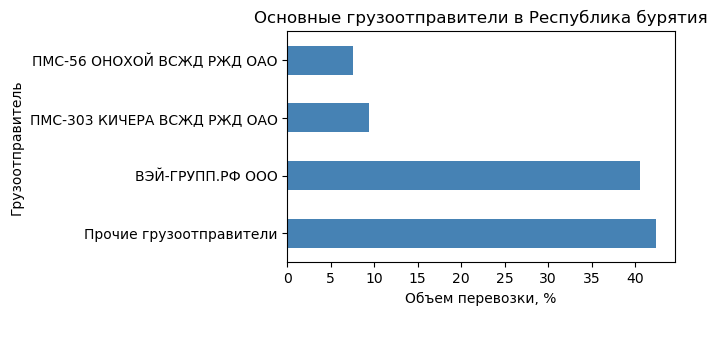

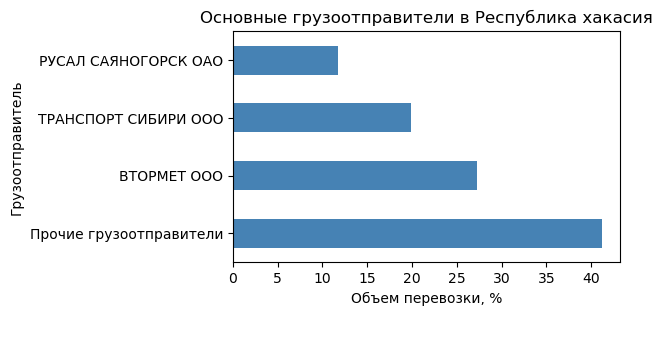

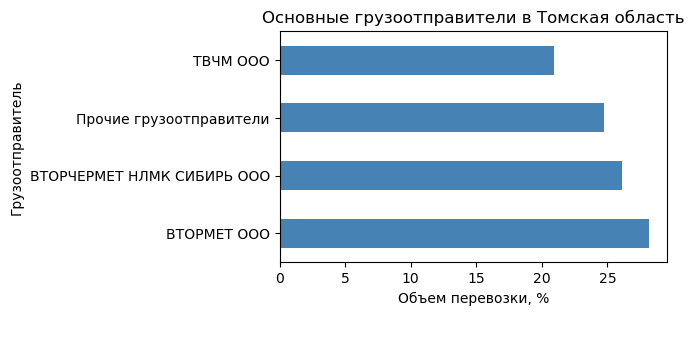

In [23]:
#в данном случае использовался горизонтальный barplot .plot(kind='barh') библиотеки pandas
for i in top_grz_otp.sub_fed_otp_x.unique():
    #копируем выборку с регионом из top_grz_otp
    a = top_grz_otp.query('sub_fed_otp_x==@i').copy()
    #переводим абсолютные значения в относительные (возможно, можно проще, но ничего лучше пока не придумал)
    a['v_perevozok'] = a['v_perevozok']/a['v_perevozok'].sum()*100
    #строим горизонтальный barplot, без легенды, размер 5х3
    ax = a.plot(kind='barh', #горизонтально
                x = 'gruzootpravitel',
                y = 'v_perevozok',
                legend = False, #легенда скрыта
                figsize=(5,3), #размер области построения
                color = 'steelblue') #цвет
    #добавляем заголовок и подписи осей
    ax.set(xlabel='Объем перевозки, %\n\n',
           ylabel='Грузоотправитель',
           title = f'Основные грузоотправители в {i.capitalize()}') #capitalize для отображения текста "Как в предложениях"

На данных графиках можно увидеть основных грузоотправителей в каждом регионе.  
Рассмотрим несколько из них:  
1. В Иркутской области почти 60% лома отправляют Прочие грузоотправители.
2. В Кемеровской области Прочие грузоотправители также отправляют большую часть лома (>60%). Среди основных грузоотправителей существенно выделяется ООО ВТОРМЕТ, отправляющий почти 30% всего лома Кемеровской области.  
3. В Красноярском крае Прочие грузоотправители отправляют меньшую долю лома (около 45%), нежели в рассмотренных выше регионах.  Это связано сильным положением грузоотправителей ООО ВТОРМЕТ и ООО ВЭЙ (около 25% и 20% соответственно).

Во второй задаче мы определили основных потребителей металлолома в каждом регионе, а всех остальных объединили в прочих потребителей.  
Визуализируем общие объемы полученного лома по регионам.

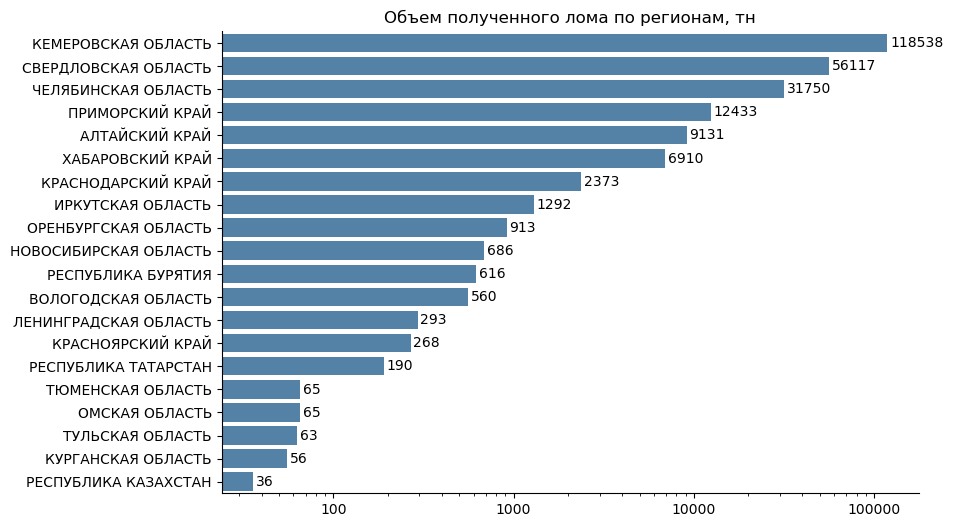

In [24]:
#область построения 11х6
plt.figure(figsize=(9,6))
#группируем по региону, суммируем общий объем, сортируем по убыванию
total_v = zavods.groupby('sub_fed_nazn', as_index=False)\
                  .agg({'v_perevozok':'sum'})\
                  .sort_values('v_perevozok', ascending = False)
ax = sns.barplot(data=total_v,
                 x="v_perevozok",
                 y='sub_fed_nazn',
                 ci= None, #отключаем линию погрешности
                 log=True, #используем log=True, чтобы отобразить регионы с малым объемом
                 color='steelblue') #задаем цвет
ax.set(xlabel= None,
       ylabel= None,
       title = 'Объем полученного лома по регионам, тн')
#переводим формат оси х из степеней в скалярные величины
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
#подписи значений столбцов, padding задает расстояние от вершины, fmt устанавливает формат - округление до целых
ax.bar_label(ax.containers[0], padding = 2, fmt = '%.0f')
sns.despine()

Таким образом, в Кемеровскую область поступает существенная доля всего перевозимого лома (в два раза больше, чем в Свердловскую область и почти в четыре раза больше, чем в Челябинскую область)  
Рассмотрим каждый регион подробнее:

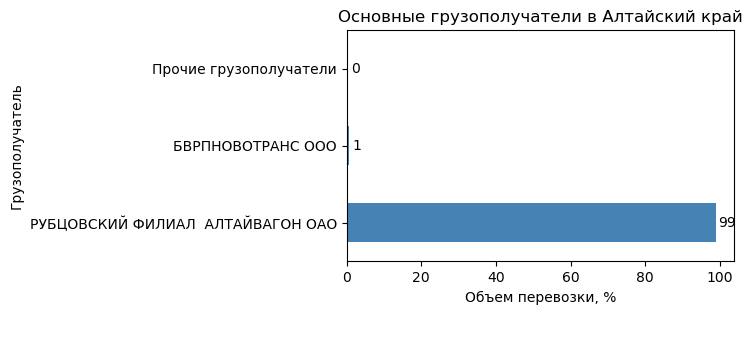

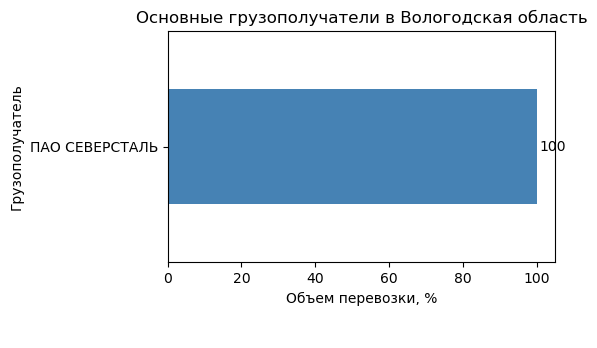

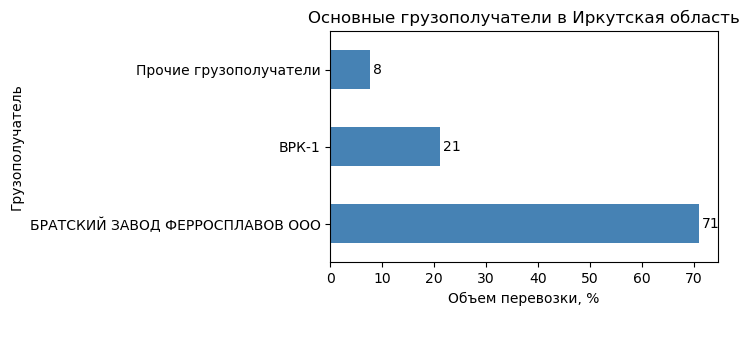

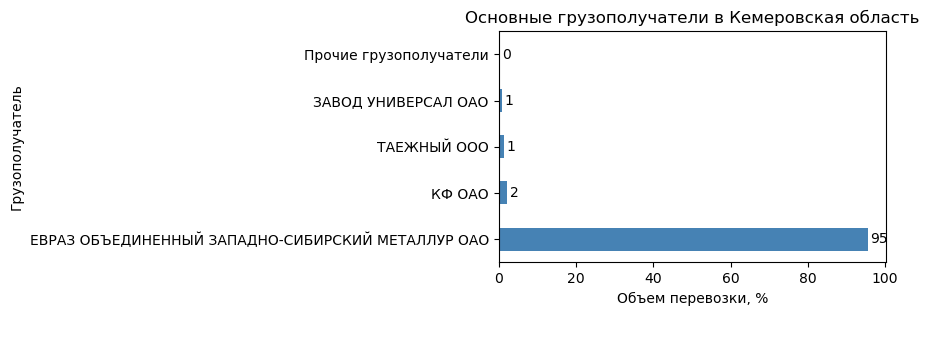

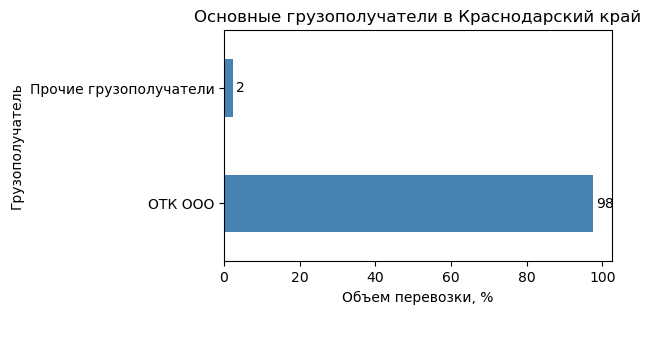

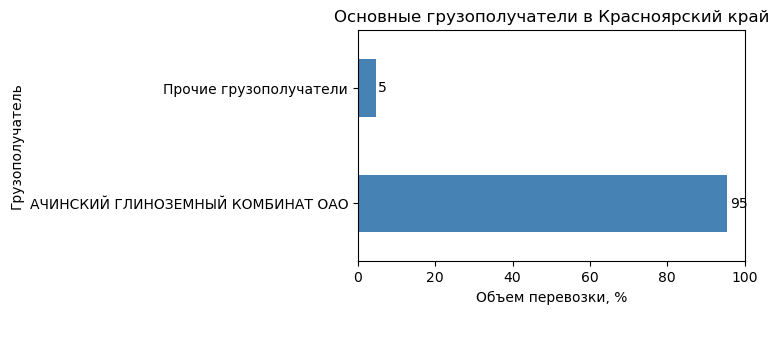

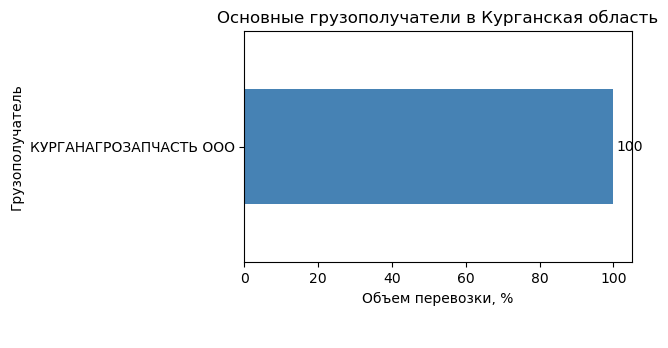

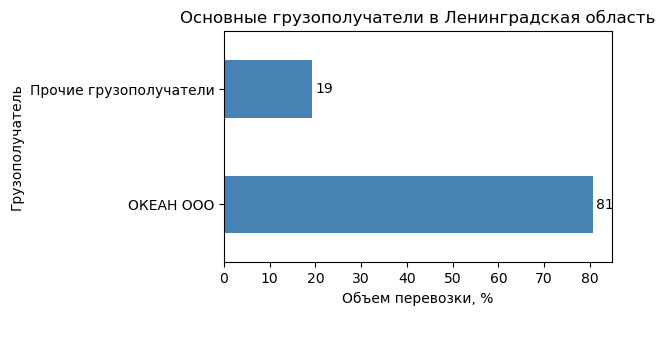

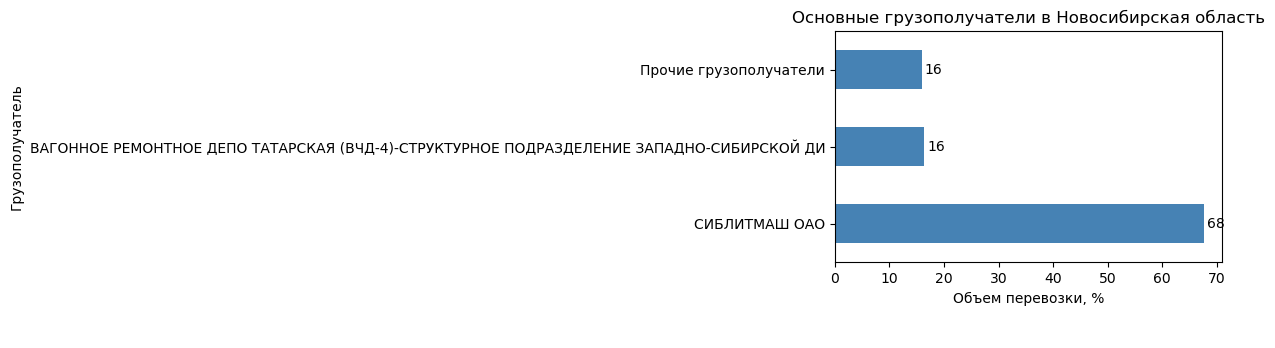

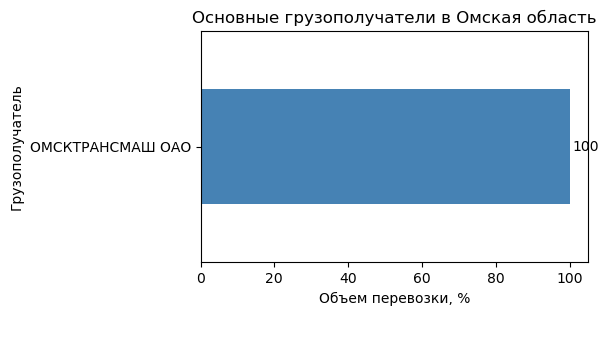

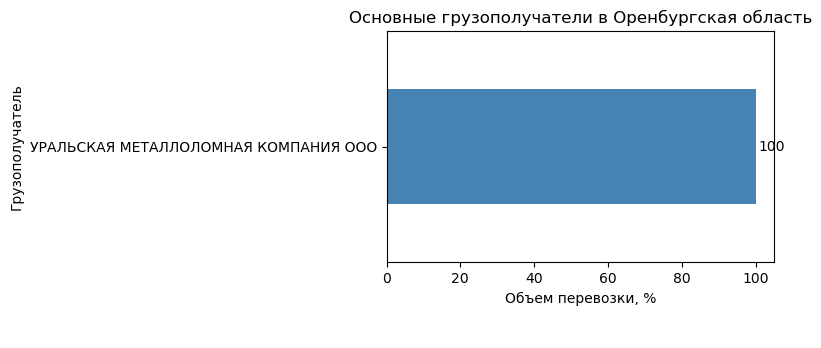

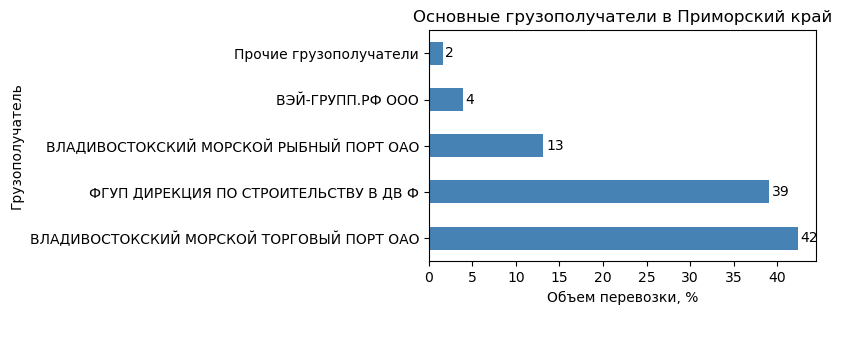

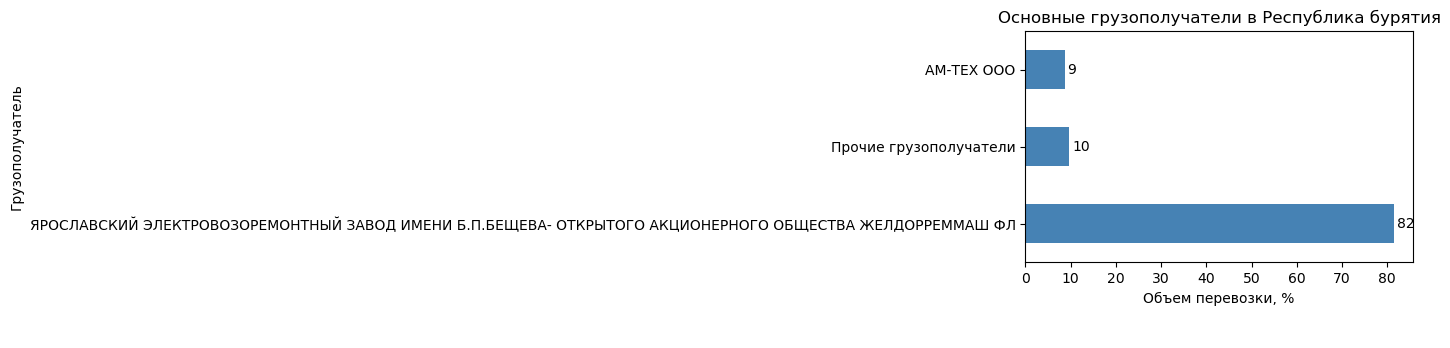

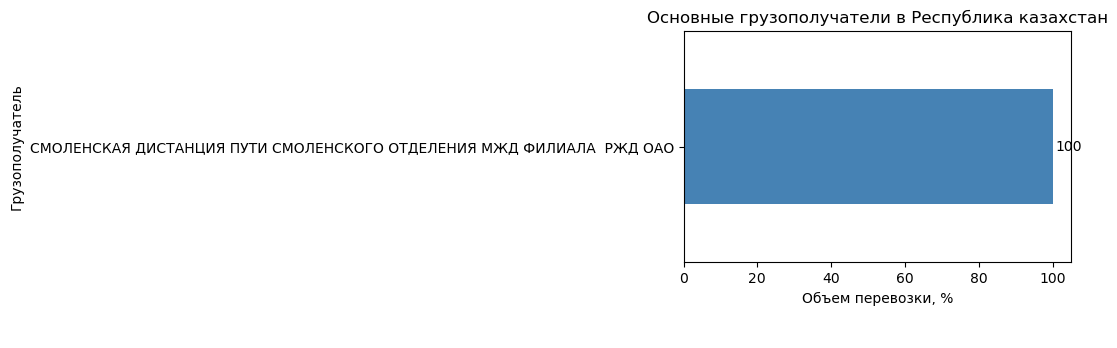

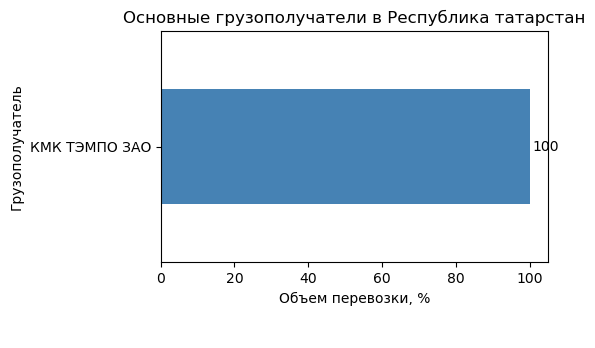

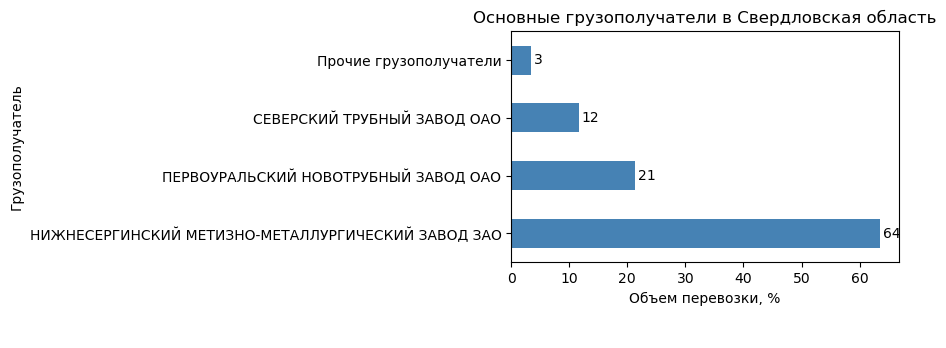

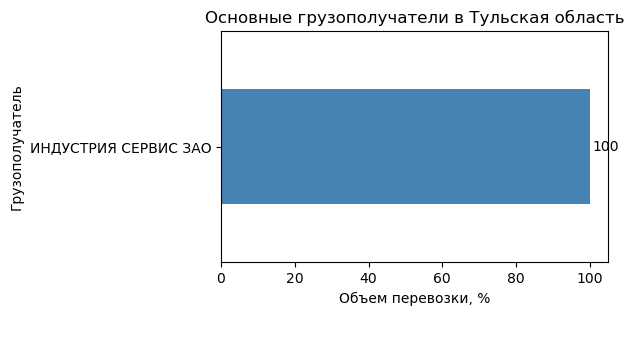

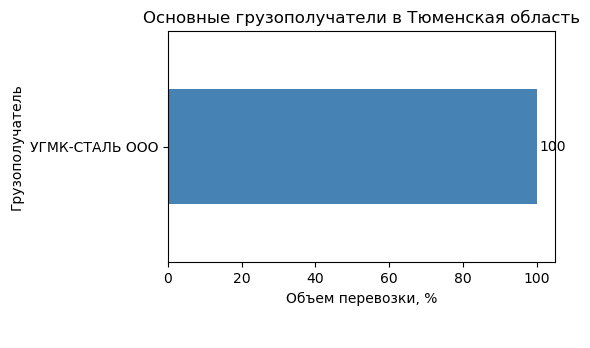

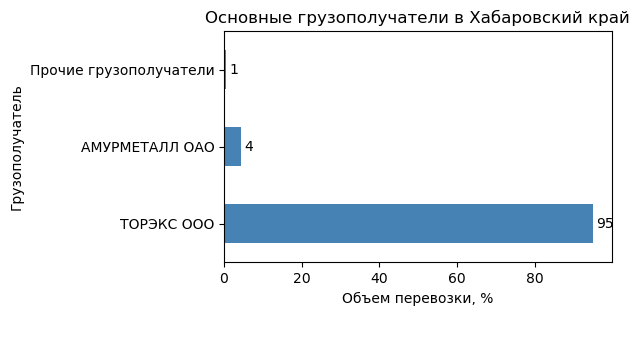

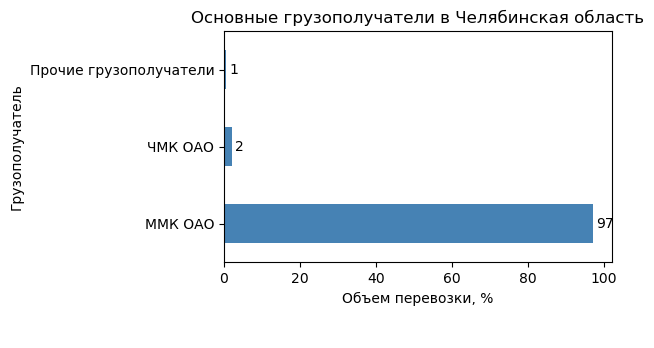

In [25]:
#получаем все уникальные регионы
for i in zavods.sub_fed_nazn.unique():
    #копируем выборку с регионом из zavods
    a = zavods.query('sub_fed_nazn==@i').copy()
    #переводим абсолютные значения в относительные
    a['v_perevozok'] = a['v_perevozok']/a['v_perevozok'].sum()*100
    #строим горизонтальный barplot, без легенды, размер 5х3
    ax = a.plot(kind='barh',
                x = 'gruzopoluch',
                y = 'v_perevozok',
                legend = False, #убираем легенду
                figsize=(5,3),
                color = 'steelblue')
    #добавляем заголовок и подписи осей
    ax.set(xlabel='Объем перевозки, %\n\n',
           ylabel='Грузополучатель',
           title = f'Основные грузополучатели в {i.capitalize()}')
    ax.bar_label(ax.containers[0], padding = 2, fmt = '%.0f')

Крупнейшим грузополучателем Кемеровской области является ОАО ЕВРАЗ - около 95% всего объема перевозимого лома.  
В Свердловской области основными грузополучателями являются НСММЗ (64%), ПНТЗ (21%) и СТЗ (12%).  
В Челябинской области крупнейшим грузополучателем является ММК - около 97%.

В задаче 3 мы определили топ-10 основных арендаторов вагонов.  
Визуализируем полученные данные.

In [26]:
fig = px.bar(arendators.sort_values(), #данные с сортировкой
             text = 'value', #подписи столбцов - значения
             color_discrete_sequence =['steelblue'], #цвет графика - steelbue
             orientation='h') #горизонтально
fig.update_layout(title="Основные арендаторы вагонов", #название графика
                  title_x=0.5, #название графика посередине
                  xaxis_title=None, #отключаем название оси х
                  yaxis_title=None, #отключаемназвание оси y
                  showlegend=False, #не показывать легенду
                  plot_bgcolor='rgba(0,0,0,0)') #фон белый
fig.show()

Видно, что АО НЕФТЕТРАНССЕРВИС и АО НПК являются лидерами среди основных арендаторов вагонов.  
Также существенное количество вагонов арендуют АО ПГК и АО ФГК.